## PA3.5(b) - Transfer Learning

### Use TL to replace encoder layer of FCN

In [1]:
## Data generation

In [2]:
from utils import *
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import torch
import gc
import copy
from dataloader_4 import *
from starter_4 import *
from tl_fcn import *


in starter_4
GPU_STATUS: True


In [3]:
# Precomputed Class Weights
class_weights = 1.0 / torch.FloatTensor([1.7796e-01, 6.1295e-01, 4.1182e-02, 8.9837e-03, 1.0163e-01, 6.8722e-03,
        1.4485e-03, 1.5937e-04, 4.7746e-02, 1.0698e-03])

In [4]:
#hyper param
epochs = 50   
lr = 0.0004
# criterion = nn.CrossEntropyLoss(weight=class_weights, reduction="mean")# Choose an appropriate loss function from https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html
criterion = nn.CrossEntropyLoss()
n_class = 10

print("creating model...")
fcn_model = TL_FCN(n_class=n_class)
fcn_model.apply(init_weights)

# gpu
gpu_status = torch.cuda.is_available()
print("GPU:", gpu_status)

if gpu_status : 
    device = torch.device('cuda') # determine which device to use (gpu or cpu)
else : 
    device = torch.device('cpu')

fcn_model.to(device)
    
print("Training...")
val(fcn_model, 0)  # show the accuracy before training
model_name="latest_model_5b_50e"
train_loss_record, valid_loss_record = train(fcn_model, epochs,lr, save_fp=model_name) 

creating model...


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /tmp/xdg-cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

GPU: True
Training...
in val


/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()
/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_m

Loss at epoch: 0 is 2.876591580254691
IoU at epoch: 0 is 0.024388424688120625
Pixel acc at epoch: 0 is 0.12080296341861997
in train


  0%|          | 0/50 [00:00<?, ?it/s]

epoch0, iter0, loss: 1.8204591274261475
epoch0, iter10, loss: 2.002882719039917
epoch0, iter20, loss: 1.662959098815918
epoch0, iter30, loss: 1.8835901021957397
epoch0, iter40, loss: 1.3463973999023438
epoch0, iter50, loss: 1.1392014026641846
Finish epoch 0, time elapsed 126.47882795333862
in val
Loss at epoch: 0 is 1.7981125286647253
IoU at epoch: 0 is 0.12296024480926304
Pixel acc at epoch: 0 is 0.6122492509228843


  2%|▏         | 1/50 [02:17<1:52:29, 137.74s/it]

epoch1, iter0, loss: 1.616517186164856
epoch1, iter10, loss: 1.1490504741668701
epoch1, iter20, loss: 0.9783495664596558
epoch1, iter30, loss: 1.1920721530914307
epoch1, iter40, loss: 0.7837555408477783
epoch1, iter50, loss: 0.7497467398643494
Finish epoch 1, time elapsed 127.8190176486969
in val
Loss at epoch: 1 is 0.9070067661149162
IoU at epoch: 1 is 0.22525810357318918
Pixel acc at epoch: 1 is 0.7391456961631775


  4%|▍         | 2/50 [04:35<1:50:10, 137.72s/it]

epoch2, iter0, loss: 0.6872137784957886
epoch2, iter10, loss: 0.7654778361320496
epoch2, iter20, loss: 0.697338342666626
epoch2, iter30, loss: 0.733849287033081
epoch2, iter40, loss: 0.8583885431289673
epoch2, iter50, loss: 0.9061192274093628
Finish epoch 2, time elapsed 125.33545088768005
in val


  6%|▌         | 3/50 [06:49<1:46:27, 135.91s/it]

Loss at epoch: 2 is 0.9162682550294059
IoU at epoch: 2 is 0.215770431568688
Pixel acc at epoch: 2 is 0.699334591627121
epoch3, iter0, loss: 0.8757686018943787
epoch3, iter10, loss: 0.5485485792160034
epoch3, iter20, loss: 0.8385360240936279
epoch3, iter30, loss: 0.7180113196372986
epoch3, iter40, loss: 0.8938161134719849
epoch3, iter50, loss: 1.0125627517700195
Finish epoch 3, time elapsed 125.35226726531982
in val
Loss at epoch: 3 is 0.8226826616695949
IoU at epoch: 3 is 0.2682904278294545
Pixel acc at epoch: 3 is 0.764596164226532


  8%|▊         | 4/50 [09:05<1:44:14, 135.97s/it]

epoch4, iter0, loss: 0.6724261045455933
epoch4, iter10, loss: 1.0658979415893555
epoch4, iter20, loss: 1.0106158256530762
epoch4, iter30, loss: 0.7234814167022705
epoch4, iter40, loss: 0.6014037728309631
epoch4, iter50, loss: 0.5438554883003235
Finish epoch 4, time elapsed 122.76675581932068
in val
Loss at epoch: 4 is 0.7812902501651219
IoU at epoch: 4 is 0.27072539018080005
Pixel acc at epoch: 4 is 0.771763665335519


 10%|█         | 5/50 [11:17<1:41:05, 134.80s/it]

epoch5, iter0, loss: 0.5856289267539978
epoch5, iter10, loss: 0.6894901394844055
epoch5, iter20, loss: 0.7404382228851318
epoch5, iter30, loss: 0.6868473291397095
epoch5, iter40, loss: 0.6655194759368896
epoch5, iter50, loss: 0.834236741065979
Finish epoch 5, time elapsed 124.69242715835571
in val
Loss at epoch: 5 is 0.619479809488569
IoU at epoch: 5 is 0.33603874662101535
Pixel acc at epoch: 5 is 0.814670979976654


 12%|█▏        | 6/50 [13:32<1:38:44, 134.64s/it]

epoch6, iter0, loss: 0.6299213171005249
epoch6, iter10, loss: 0.6220580339431763
epoch6, iter20, loss: 0.6435363292694092
epoch6, iter30, loss: 0.3565751612186432
epoch6, iter40, loss: 0.529140055179596
epoch6, iter50, loss: 1.1820474863052368
Finish epoch 6, time elapsed 127.24485158920288
in val


 14%|█▍        | 7/50 [15:49<1:36:59, 135.33s/it]

Loss at epoch: 6 is 0.7114374211856297
IoU at epoch: 6 is 0.3048890580834672
Pixel acc at epoch: 6 is 0.7830050417355129
epoch7, iter0, loss: 0.4523496627807617
epoch7, iter10, loss: 0.5825821757316589
epoch7, iter20, loss: 0.5744272470474243
epoch7, iter30, loss: 0.45400846004486084
epoch7, iter40, loss: 0.41503795981407166
epoch7, iter50, loss: 0.5143244862556458
Finish epoch 7, time elapsed 129.39234495162964
in val
Loss at epoch: 7 is 0.6549708885805947
IoU at epoch: 7 is 0.3684055404993983
Pixel acc at epoch: 7 is 0.8146844506263733


 16%|█▌        | 8/50 [18:08<1:35:41, 136.70s/it]

epoch8, iter0, loss: 0.5244926810264587
epoch8, iter10, loss: 0.46954208612442017
epoch8, iter20, loss: 0.5759755373001099
epoch8, iter30, loss: 0.3561830520629883
epoch8, iter40, loss: 0.48800694942474365
epoch8, iter50, loss: 0.6813141107559204
Finish epoch 8, time elapsed 130.20347499847412
in val


 18%|█▊        | 9/50 [20:29<1:34:15, 137.94s/it]

Loss at epoch: 8 is 0.578433347599847
IoU at epoch: 8 is 0.3465063957061382
Pixel acc at epoch: 8 is 0.8160439048494611
epoch9, iter0, loss: 0.7640007734298706
epoch9, iter10, loss: 0.5188360214233398
epoch9, iter20, loss: 0.40924781560897827
epoch9, iter30, loss: 0.6089634895324707
epoch9, iter40, loss: 1.0268125534057617
epoch9, iter50, loss: 0.3973129391670227
Finish epoch 9, time elapsed 127.42143416404724
in val


 20%|██        | 10/50 [22:45<1:31:38, 137.47s/it]

Loss at epoch: 9 is 0.5732653822217669
IoU at epoch: 9 is 0.3543737347726394
Pixel acc at epoch: 9 is 0.8431947486741203
epoch10, iter0, loss: 0.7093871831893921
epoch10, iter10, loss: 0.5466222167015076
epoch10, iter20, loss: 0.4313374161720276
epoch10, iter30, loss: 0.4071253836154938
epoch10, iter40, loss: 0.471014142036438
epoch10, iter50, loss: 0.4352160096168518
Finish epoch 10, time elapsed 124.96897745132446
in val
Loss at epoch: 10 is 0.5011195710727147
IoU at epoch: 10 is 0.3882097664803097
Pixel acc at epoch: 10 is 0.8407318251473563


 22%|██▏       | 11/50 [25:01<1:28:59, 136.90s/it]

epoch11, iter0, loss: 0.5554541349411011
epoch11, iter10, loss: 0.2941862940788269
epoch11, iter20, loss: 0.5820795297622681
epoch11, iter30, loss: 0.7093858122825623
epoch11, iter40, loss: 0.381884902715683
epoch11, iter50, loss: 0.6047400236129761
Finish epoch 11, time elapsed 124.17583394050598
in val


 24%|██▍       | 12/50 [27:15<1:26:15, 136.19s/it]

Loss at epoch: 11 is 0.5155965856143406
IoU at epoch: 11 is 0.37889497739299605
Pixel acc at epoch: 11 is 0.8307287267276219
epoch12, iter0, loss: 0.3576672673225403
epoch12, iter10, loss: 0.5214343070983887
epoch12, iter20, loss: 0.3987187445163727
epoch12, iter30, loss: 0.23322142660617828
epoch12, iter40, loss: 0.7125434875488281
epoch12, iter50, loss: 0.4367979168891907
Finish epoch 12, time elapsed 123.21131706237793
in val
Loss at epoch: 12 is 0.4372653237410954
IoU at epoch: 12 is 0.4309001225529898
Pixel acc at epoch: 12 is 0.8514607633863177


 26%|██▌       | 13/50 [29:29<1:23:24, 135.27s/it]

epoch13, iter0, loss: 0.4536060094833374
epoch13, iter10, loss: 0.3836139142513275
epoch13, iter20, loss: 0.6311414241790771
epoch13, iter30, loss: 0.43975189328193665
epoch13, iter40, loss: 0.672478973865509
epoch13, iter50, loss: 0.5339162349700928
Finish epoch 13, time elapsed 127.25889301300049
in val


 28%|██▊       | 14/50 [31:46<1:21:30, 135.84s/it]

Loss at epoch: 13 is 0.44908917801720755
IoU at epoch: 13 is 0.4127318674155728
Pixel acc at epoch: 13 is 0.8544036490576608
epoch14, iter0, loss: 0.7768075466156006
epoch14, iter10, loss: 0.37145987153053284
epoch14, iter20, loss: 0.2607848346233368
epoch14, iter30, loss: 0.6287656426429749
epoch14, iter40, loss: 0.46844613552093506
epoch14, iter50, loss: 0.6061227321624756
Finish epoch 14, time elapsed 123.61043381690979
in val


 30%|███       | 15/50 [34:00<1:18:59, 135.42s/it]

Loss at epoch: 14 is 0.6625156360013145
IoU at epoch: 14 is 0.32873708668938517
Pixel acc at epoch: 14 is 0.7865045581545148
epoch15, iter0, loss: 0.36608150601387024
epoch15, iter10, loss: 0.3170348107814789
epoch15, iter20, loss: 0.38747429847717285
epoch15, iter30, loss: 0.40485522150993347
epoch15, iter40, loss: 0.5095128417015076
epoch15, iter50, loss: 0.46068504452705383
Finish epoch 15, time elapsed 129.3762125968933
in val


 32%|███▏      | 16/50 [36:21<1:17:36, 136.95s/it]

Loss at epoch: 15 is 0.5887780615261623
IoU at epoch: 15 is 0.36274779990712464
Pixel acc at epoch: 15 is 0.8046313098498753
epoch16, iter0, loss: 0.388033002614975
epoch16, iter10, loss: 0.5343384146690369
epoch16, iter20, loss: 0.6373161673545837
epoch16, iter30, loss: 0.2610826790332794
epoch16, iter40, loss: 0.25747859477996826
epoch16, iter50, loss: 0.6477596759796143
Finish epoch 16, time elapsed 128.07073402404785
in val


 34%|███▍      | 17/50 [38:38<1:15:20, 136.98s/it]

Loss at epoch: 16 is 0.5006062814167568
IoU at epoch: 16 is 0.3877955330569427
Pixel acc at epoch: 16 is 0.8343362978526524
epoch17, iter0, loss: 0.35299092531204224
epoch17, iter10, loss: 0.5449032187461853
epoch17, iter20, loss: 0.36659425497055054
epoch17, iter30, loss: 0.4365461468696594
epoch17, iter40, loss: 0.3964305818080902
epoch17, iter50, loss: 0.32902437448501587
Finish epoch 17, time elapsed 126.80039668083191
in val


 36%|███▌      | 18/50 [40:54<1:12:58, 136.84s/it]

Loss at epoch: 17 is 0.5224379215921674
IoU at epoch: 17 is 0.40346370366278733
Pixel acc at epoch: 17 is 0.8449650151388985
epoch18, iter0, loss: 0.2828059792518616
epoch18, iter10, loss: 0.34064415097236633
epoch18, iter20, loss: 0.49336570501327515
epoch18, iter30, loss: 0.6910220980644226
epoch18, iter40, loss: 0.298877090215683
epoch18, iter50, loss: 0.41862523555755615
Finish epoch 18, time elapsed 128.97412657737732
in val
Loss at epoch: 18 is 0.365671979529517
IoU at epoch: 18 is 0.4379579979311801
Pixel acc at epoch: 18 is 0.887850684779031


 38%|███▊      | 19/50 [43:14<1:11:08, 137.69s/it]

epoch19, iter0, loss: 0.3912156820297241
epoch19, iter10, loss: 0.511560320854187
epoch19, iter20, loss: 0.2885676622390747
epoch19, iter30, loss: 0.3000901937484741
epoch19, iter40, loss: 0.2031099945306778
epoch19, iter50, loss: 0.23377373814582825
Finish epoch 19, time elapsed 127.81302571296692
in val


 40%|████      | 20/50 [45:31<1:08:42, 137.42s/it]

Loss at epoch: 19 is 0.46030796425683157
IoU at epoch: 19 is 0.3947304307699336
Pixel acc at epoch: 19 is 0.8830559168543134
epoch20, iter0, loss: 0.172221839427948
epoch20, iter10, loss: 0.4181550145149231
epoch20, iter20, loss: 0.42344391345977783
epoch20, iter30, loss: 0.4438350200653076
epoch20, iter40, loss: 0.465947687625885
epoch20, iter50, loss: 0.3566487729549408
Finish epoch 20, time elapsed 125.18528175354004
in val


 42%|████▏     | 21/50 [47:46<1:06:04, 136.71s/it]

Loss at epoch: 20 is 0.39402240089007784
IoU at epoch: 20 is 0.4311109982539695
Pixel acc at epoch: 20 is 0.8710714493479047
epoch21, iter0, loss: 0.19198264181613922
epoch21, iter10, loss: 0.2807752192020416
epoch21, iter20, loss: 0.3091075122356415
epoch21, iter30, loss: 0.4495149254798889
epoch21, iter40, loss: 0.3440999686717987
epoch21, iter50, loss: 0.45554977655410767
Finish epoch 21, time elapsed 122.87213706970215
in val


 44%|████▍     | 22/50 [49:58<1:03:13, 135.48s/it]

Loss at epoch: 21 is 0.5050558745861053
IoU at epoch: 21 is 0.42689276636470447
Pixel acc at epoch: 21 is 0.8470452342714582
epoch22, iter0, loss: 0.34388840198516846
epoch22, iter10, loss: 0.32180076837539673
epoch22, iter20, loss: 0.2973279654979706
epoch22, iter30, loss: 0.27921339869499207
epoch22, iter40, loss: 0.5594747066497803
epoch22, iter50, loss: 0.3209918439388275
Finish epoch 22, time elapsed 118.87716841697693
in val
Loss at epoch: 22 is 0.33645766973495483
IoU at epoch: 22 is 0.4872179225975229
Pixel acc at epoch: 22 is 0.8892990350723267


 46%|████▌     | 23/50 [52:07<1:00:04, 133.51s/it]

epoch23, iter0, loss: 0.3325388431549072
epoch23, iter10, loss: 0.5701619982719421
epoch23, iter20, loss: 0.4230310916900635
epoch23, iter30, loss: 0.42599499225616455
epoch23, iter40, loss: 0.33995088934898376
epoch23, iter50, loss: 0.19694826006889343
Finish epoch 23, time elapsed 124.92862367630005
in val


 48%|████▊     | 24/50 [54:21<57:55, 133.68s/it]  

Loss at epoch: 23 is 0.33647474007947104
IoU at epoch: 23 is 0.4455621966836359
Pixel acc at epoch: 23 is 0.8958193574632917
epoch24, iter0, loss: 0.16178074479103088
epoch24, iter10, loss: 0.3116244971752167
epoch24, iter20, loss: 0.3153893053531647
epoch24, iter30, loss: 0.23217995464801788
epoch24, iter40, loss: 0.23249872028827667
epoch24, iter50, loss: 0.2601054012775421
Finish epoch 24, time elapsed 126.01023459434509
in val


 50%|█████     | 25/50 [56:37<55:53, 134.14s/it]

Loss at epoch: 24 is 0.3516183133636202
IoU at epoch: 24 is 0.45845690969095426
Pixel acc at epoch: 24 is 0.8874783856528146
epoch25, iter0, loss: 0.2234586924314499
epoch25, iter10, loss: 0.3800393342971802
epoch25, iter20, loss: 0.24160583317279816
epoch25, iter30, loss: 0.2689235806465149
epoch25, iter40, loss: 0.24148082733154297
epoch25, iter50, loss: 0.250867635011673
Finish epoch 25, time elapsed 122.97165060043335
in val


 52%|█████▏    | 26/50 [58:49<53:23, 133.49s/it]

Loss at epoch: 25 is 0.3123363895075662
IoU at epoch: 25 is 0.4582589601786636
Pixel acc at epoch: 25 is 0.9006273916789463
epoch26, iter0, loss: 0.2758883833885193
epoch26, iter10, loss: 0.2941311001777649
epoch26, iter20, loss: 0.2442714422941208
epoch26, iter30, loss: 0.37753191590309143
epoch26, iter40, loss: 0.38630586862564087
epoch26, iter50, loss: 0.226841002702713
Finish epoch 26, time elapsed 124.48672771453857
in val


 54%|█████▍    | 27/50 [1:01:03<51:15, 133.70s/it]

Loss at epoch: 26 is 0.295693501830101
IoU at epoch: 26 is 0.4708280560158845
Pixel acc at epoch: 26 is 0.9028112718037197
epoch27, iter0, loss: 0.28558772802352905
epoch27, iter10, loss: 0.28202125430107117
epoch27, iter20, loss: 0.6535789966583252
epoch27, iter30, loss: 0.2979365289211273
epoch27, iter40, loss: 0.3373662531375885
epoch27, iter50, loss: 0.2996543049812317
Finish epoch 27, time elapsed 130.19066262245178
in val


 56%|█████▌    | 28/50 [1:03:22<49:40, 135.48s/it]

Loss at epoch: 27 is 0.541786036321095
IoU at epoch: 27 is 0.39820646500368573
Pixel acc at epoch: 27 is 0.8499613744871957
epoch28, iter0, loss: 0.2901877164840698
epoch28, iter10, loss: 0.25034335255622864
epoch28, iter20, loss: 0.40953168272972107
epoch28, iter30, loss: 0.21626049280166626
epoch28, iter40, loss: 0.34660232067108154
epoch28, iter50, loss: 0.44252923130989075
Finish epoch 28, time elapsed 125.1808865070343
in val


 58%|█████▊    | 29/50 [1:05:35<47:09, 134.73s/it]

Loss at epoch: 28 is 0.38260801136493683
IoU at epoch: 28 is 0.4716152422914922
Pixel acc at epoch: 28 is 0.8883923973355975
epoch29, iter0, loss: 0.251903235912323
epoch29, iter10, loss: 0.1537657380104065
epoch29, iter20, loss: 0.24544961750507355
epoch29, iter30, loss: 0.2516629099845886
epoch29, iter40, loss: 0.2740715742111206
epoch29, iter50, loss: 0.311117023229599
Finish epoch 29, time elapsed 127.17048406600952
in val


 60%|██████    | 30/50 [1:07:53<45:09, 135.46s/it]

Loss at epoch: 29 is 0.3320730434996741
IoU at epoch: 29 is 0.4615747630821204
Pixel acc at epoch: 29 is 0.9015424507004874
epoch30, iter0, loss: 0.32736268639564514
epoch30, iter10, loss: 0.5774261951446533
epoch30, iter20, loss: 0.19012396037578583
epoch30, iter30, loss: 0.35804951190948486
epoch30, iter40, loss: 0.1705402284860611
epoch30, iter50, loss: 0.2919217646121979
Finish epoch 30, time elapsed 128.99216771125793
in val
Loss at epoch: 30 is 0.3174341150692531
IoU at epoch: 30 is 0.4945589575951902
Pixel acc at epoch: 30 is 0.9000634125300816


 62%|██████▏   | 31/50 [1:10:12<43:17, 136.71s/it]

epoch31, iter0, loss: 0.18659375607967377
epoch31, iter10, loss: 0.344953328371048
epoch31, iter20, loss: 0.20716942846775055
epoch31, iter30, loss: 0.18657532334327698
epoch31, iter40, loss: 0.3915128707885742
epoch31, iter50, loss: 0.3591366112232208
Finish epoch 31, time elapsed 127.0972249507904
in val


 64%|██████▍   | 32/50 [1:12:29<40:58, 136.60s/it]

Loss at epoch: 31 is 0.5108668399708611
IoU at epoch: 31 is 0.4689280933288792
Pixel acc at epoch: 31 is 0.8641264694077628
epoch32, iter0, loss: 0.15505920350551605
epoch32, iter10, loss: 0.2661444842815399
epoch32, iter20, loss: 0.16661030054092407
epoch32, iter30, loss: 0.5924044847488403
epoch32, iter40, loss: 0.25897520780563354
epoch32, iter50, loss: 0.19111268222332
Finish epoch 32, time elapsed 122.66020369529724
in val
Loss at epoch: 32 is 0.35441538052899496
IoU at epoch: 32 is 0.4969365971482563
Pixel acc at epoch: 32 is 0.8847694907869611


 66%|██████▌   | 33/50 [1:14:40<38:18, 135.19s/it]

epoch33, iter0, loss: 0.41354915499687195
epoch33, iter10, loss: 0.3039059042930603
epoch33, iter20, loss: 0.27769842743873596
epoch33, iter30, loss: 0.2252551168203354
epoch33, iter40, loss: 0.148750439286232
epoch33, iter50, loss: 0.3184676170349121
Finish epoch 33, time elapsed 124.27217292785645
in val


 68%|██████▊   | 34/50 [1:16:55<35:59, 134.99s/it]

Loss at epoch: 33 is 0.2800471654960087
IoU at epoch: 33 is 0.4577205353065409
Pixel acc at epoch: 33 is 0.9046554735728672
epoch34, iter0, loss: 0.23738357424736023
epoch34, iter10, loss: 0.2816503942012787
epoch34, iter20, loss: 0.23909705877304077
epoch34, iter30, loss: 0.3553072214126587
epoch34, iter40, loss: 0.17625947296619415
epoch34, iter50, loss: 0.3662680387496948
Finish epoch 34, time elapsed 118.03536486625671
in val
Loss at epoch: 34 is 0.4068453439644405
IoU at epoch: 34 is 0.4996849258938201
Pixel acc at epoch: 34 is 0.8843326057706561


 70%|███████   | 35/50 [1:19:03<33:13, 132.87s/it]

epoch35, iter0, loss: 0.46958059072494507
epoch35, iter10, loss: 0.19285644590854645
epoch35, iter20, loss: 0.1690068244934082
epoch35, iter30, loss: 0.3031676709651947
epoch35, iter40, loss: 0.23588784039020538
epoch35, iter50, loss: 0.21838586032390594
Finish epoch 35, time elapsed 124.31117725372314
in val


 72%|███████▏  | 36/50 [1:21:17<31:07, 133.37s/it]

Loss at epoch: 35 is 0.424330541065761
IoU at epoch: 35 is 0.4687663440320951
Pixel acc at epoch: 35 is 0.8568555968148368
epoch36, iter0, loss: 0.4311584532260895
epoch36, iter10, loss: 0.18350552022457123
epoch36, iter20, loss: 0.331043004989624
epoch36, iter30, loss: 0.2974199056625366
epoch36, iter40, loss: 0.21404331922531128
epoch36, iter50, loss: 0.25623512268066406
Finish epoch 36, time elapsed 123.9542760848999
in val


 74%|███████▍  | 37/50 [1:23:33<29:02, 134.04s/it]

Loss at epoch: 36 is 0.45370772055217196
IoU at epoch: 36 is 0.4728609992122825
Pixel acc at epoch: 36 is 0.8408640708242144
epoch37, iter0, loss: 0.24919098615646362
epoch37, iter10, loss: 0.31853044033050537
epoch37, iter20, loss: 0.18505993485450745
epoch37, iter30, loss: 0.21288473904132843
epoch37, iter40, loss: 0.3448319733142853
epoch37, iter50, loss: 0.26518189907073975
Finish epoch 37, time elapsed 121.58376717567444
in val
Loss at epoch: 37 is 0.23932287522724696
IoU at epoch: 37 is 0.5036900297231374
Pixel acc at epoch: 37 is 0.9176276922225952


 76%|███████▌  | 38/50 [1:25:44<26:36, 133.03s/it]

epoch38, iter0, loss: 0.31990569829940796
epoch38, iter10, loss: 0.2888237535953522
epoch38, iter20, loss: 0.2826951742172241
epoch38, iter30, loss: 0.19837988913059235
epoch38, iter40, loss: 0.10423431545495987
epoch38, iter50, loss: 0.23820018768310547
Finish epoch 38, time elapsed 112.88191723823547
in val
Loss at epoch: 38 is 0.268785868372236
IoU at epoch: 38 is 0.5217359817618831
Pixel acc at epoch: 38 is 0.9086448550224304


 78%|███████▊  | 39/50 [1:27:46<23:47, 129.81s/it]

epoch39, iter0, loss: 0.22223499417304993
epoch39, iter10, loss: 0.16662944853305817
epoch39, iter20, loss: 0.3163505494594574
epoch39, iter30, loss: 0.23408089578151703
epoch39, iter40, loss: 0.17442119121551514
epoch39, iter50, loss: 0.14619983732700348
Finish epoch 39, time elapsed 117.28058218955994
in val
Loss at epoch: 39 is 0.2740022476230349
IoU at epoch: 39 is 0.5469787629184476
Pixel acc at epoch: 39 is 0.9083552019936698


 80%|████████  | 40/50 [1:29:52<21:27, 128.72s/it]

epoch40, iter0, loss: 0.2752055525779724
epoch40, iter10, loss: 0.2306501269340515
epoch40, iter20, loss: 0.6408785581588745
epoch40, iter30, loss: 0.19308413565158844
epoch40, iter40, loss: 0.15002736449241638
epoch40, iter50, loss: 0.23664194345474243
Finish epoch 40, time elapsed 119.99639630317688
in val


 82%|████████▏ | 41/50 [1:32:02<19:21, 129.05s/it]

Loss at epoch: 40 is 0.3893177104847772
IoU at epoch: 40 is 0.5396251329523418
Pixel acc at epoch: 40 is 0.9173734017780849
epoch41, iter0, loss: 0.23774133622646332
epoch41, iter10, loss: 0.3127014935016632
epoch41, iter20, loss: 0.2956705093383789
epoch41, iter30, loss: 0.23406100273132324
epoch41, iter40, loss: 0.16951081156730652
epoch41, iter50, loss: 0.19163691997528076
Finish epoch 41, time elapsed 121.60312414169312
in val


 84%|████████▍ | 42/50 [1:34:12<17:14, 129.26s/it]

Loss at epoch: 41 is 0.587734688605581
IoU at epoch: 41 is 0.5190195688995359
Pixel acc at epoch: 41 is 0.898689159325191
epoch42, iter0, loss: 0.20548458397388458
epoch42, iter10, loss: 0.2134842723608017
epoch42, iter20, loss: 0.20795102417469025
epoch42, iter30, loss: 0.28439223766326904
epoch42, iter40, loss: 0.2656416594982147
epoch42, iter50, loss: 0.1950073391199112
Finish epoch 42, time elapsed 116.66084837913513
in val


 86%|████████▌ | 43/50 [1:36:16<14:54, 127.74s/it]

Loss at epoch: 42 is 0.4759216776915959
IoU at epoch: 42 is 0.4722344013095449
Pixel acc at epoch: 42 is 0.8379160421235221
epoch43, iter0, loss: 0.2902907133102417
epoch43, iter10, loss: 0.1379219889640808
epoch43, iter20, loss: 0.22237926721572876
epoch43, iter30, loss: 0.16039301455020905
epoch43, iter40, loss: 0.33289530873298645
epoch43, iter50, loss: 0.20296914875507355
Finish epoch 43, time elapsed 120.06709456443787
in val


 88%|████████▊ | 44/50 [1:38:26<12:50, 128.44s/it]

Loss at epoch: 43 is 0.4382801204919815
IoU at epoch: 43 is 0.5375135715141386
Pixel acc at epoch: 43 is 0.9004113759313311
epoch44, iter0, loss: 0.18040356040000916
epoch44, iter10, loss: 0.20926806330680847
epoch44, iter20, loss: 0.4770408868789673
epoch44, iter30, loss: 0.2650524973869324
epoch44, iter40, loss: 0.22832369804382324
epoch44, iter50, loss: 0.3027113974094391
Finish epoch 44, time elapsed 118.47881889343262
in val


 90%|█████████ | 45/50 [1:40:33<10:40, 128.14s/it]

Loss at epoch: 44 is 1.9389702337128776
IoU at epoch: 44 is 0.4210276152552401
Pixel acc at epoch: 44 is 0.848296446459634
epoch45, iter0, loss: 0.18426279723644257
epoch45, iter10, loss: 0.23637008666992188
epoch45, iter20, loss: 0.15242812037467957
epoch45, iter30, loss: 0.22056461870670319
epoch45, iter40, loss: 0.20511731505393982
epoch45, iter50, loss: 0.23392680287361145
Finish epoch 45, time elapsed 113.7896683216095
in val


 92%|█████████▏| 46/50 [1:42:36<08:26, 126.58s/it]

Loss at epoch: 45 is 0.2594105282000133
IoU at epoch: 45 is 0.5354617246196122
Pixel acc at epoch: 45 is 0.9103453159332275
epoch46, iter0, loss: 0.1519080400466919
epoch46, iter10, loss: 0.14313392341136932
epoch46, iter20, loss: 0.5401545763015747
epoch46, iter30, loss: 0.1342940330505371
epoch46, iter40, loss: 0.3328230082988739
epoch46, iter50, loss: 0.33166906237602234
Finish epoch 46, time elapsed 109.0197594165802
in val


 94%|█████████▍| 47/50 [1:44:31<06:09, 123.08s/it]

Loss at epoch: 46 is 0.38912261383874075
IoU at epoch: 46 is 0.47955188406483523
Pixel acc at epoch: 46 is 0.8651823656899589
epoch47, iter0, loss: 0.19654889404773712
epoch47, iter10, loss: 0.40551185607910156
epoch47, iter20, loss: 0.3502518832683563
epoch47, iter30, loss: 0.20149900019168854
epoch47, iter40, loss: 0.23673690855503082
epoch47, iter50, loss: 0.2005375176668167
Finish epoch 47, time elapsed 73.34917712211609
in val


 96%|█████████▌| 48/50 [1:45:50<03:39, 109.78s/it]

Loss at epoch: 47 is 0.2890818544796535
IoU at epoch: 47 is 0.5103433446169624
Pixel acc at epoch: 47 is 0.9048924360956464
epoch48, iter0, loss: 0.2736698389053345
epoch48, iter10, loss: 0.24424712359905243
epoch48, iter20, loss: 0.3307202458381653
epoch48, iter30, loss: 0.25449544191360474
epoch48, iter40, loss: 0.23823481798171997
epoch48, iter50, loss: 0.2602722942829132
Finish epoch 48, time elapsed 74.4414324760437
in val


 98%|█████████▊| 49/50 [1:47:11<01:41, 101.24s/it]

Loss at epoch: 48 is 0.2645234593323299
IoU at epoch: 48 is 0.536320628939263
Pixel acc at epoch: 48 is 0.9119581495012555
epoch49, iter0, loss: 0.21342426538467407
epoch49, iter10, loss: 0.17714636027812958
epoch49, iter20, loss: 0.2805432677268982
epoch49, iter30, loss: 0.2325623780488968
epoch49, iter40, loss: 0.2086717039346695
epoch49, iter50, loss: 0.1792273223400116
Finish epoch 49, time elapsed 74.93461084365845
in val
Loss at epoch: 49 is 0.2727188212530954
IoU at epoch: 49 is 0.570900846332878
Pixel acc at epoch: 49 is 0.9205954415457589


100%|██████████| 50/50 [1:48:32<00:00, 130.25s/it]


In [5]:
latest_fcn_model = torch.load(model_name)
latest_fcn_model.to(device)
test(latest_fcn_model)

in test
Loss :is 0.23097545334271022
IoU is 0.5610013863574946
Pixel is 0.9232686758041382


0

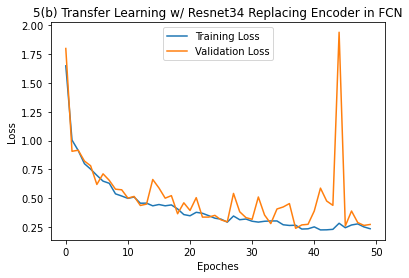

In [6]:
# Plot
plt.plot(np.arange(epochs), train_loss_record, label= "Training Loss")
plt.plot(np.arange(epochs), valid_loss_record, label="Validation Loss")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.title("5(b) Transfer Learning w/ Resnet34 Replacing Encoder in FCN")
plt.savefig("plots/Q5_b_50e")
plt.show()

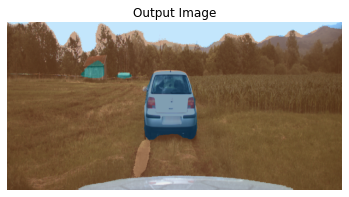

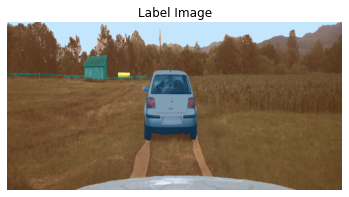

0

In [7]:
test_dataset = TASDataset('tas500v1.1', eval_mode=True, mode='test')
test_loader = DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=False)
visualize(model_name, test_loader, device)